In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report , roc_curve
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [2]:
data = pd.read_csv('C:/Users/prate/Downloads/covid.csv')

In [7]:
le = preprocessing.LabelEncoder()
pc = le.fit_transform(data['pc'].values)
wbc = le.fit_transform(data['wbc'].values)
mc = le.fit_transform(data['mc'].values)
ast = le.fit_transform(data['ast'].values)
bc = le.fit_transform(data['bc'].values)
ldh = le.fit_transform(data['ldh'].values)
y = le.fit_transform(data['diagnosis'].values)


In [8]:
x = np.array(list(zip(pc,wbc,mc,ast,bc,ldh)))

In [9]:
x

array([[1, 1, 1, 0, 1, 1],
       [1, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 1, 1],
       [1, 0, 2, 0, 0, 1],
       [1, 2, 0, 0, 1, 1],
       [1, 2, 2, 0, 1, 0],
       [2, 1, 1, 0, 1, 1],
       [2, 0, 2, 0, 1, 1],
       [2, 0, 2, 0, 0, 0],
       [2, 2, 0, 0, 1, 1],
       [2, 2, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 1],
       [0, 2, 0, 1, 1, 1],
       [0, 2, 0, 1, 0, 0],
       [0, 0, 2, 1, 1, 0],
       [1, 2, 0, 0, 0, 1],
       [2, 2, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0],
       [2, 2, 2, 0, 1, 1],
       [2, 0, 2, 0, 1, 0],
       [2, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 2, 1, 1, 1],
       [0, 2, 2, 1, 1, 1]])

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25)

naive = MultinomialNB()
naive.fit(xtrain, ytrain)
ypred = naive.predict(xtest)

In [11]:
print(accuracy_score(ytest,ypred))

0.5714285714285714


In [12]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.75      0.60      0.67         5

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [14]:
lr_prob = naive.predict_proba(xtest)
lr_prob = lr_prob[:, 1]
lr_prob

array([0.74358904, 0.64519128, 0.28421347, 0.81195809, 0.4136312 ,
       0.87826219, 0.32944466])

In [18]:
lr_fpr,lr_tpr, thres= roc_curve(ytest,lr_prob)

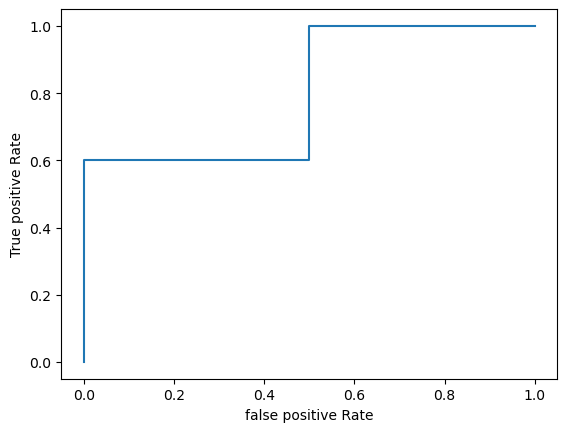

In [31]:
pyplot.plot(lr_fpr,lr_tpr)

pyplot.xlabel('false positive Rate')
pyplot.ylabel('True positive Rate')
pyplot.show()